In [4]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score


In [2]:
mnist = fetch_openml('mnist_784',version=1)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
mnist['data'].shape

(70000, 784)

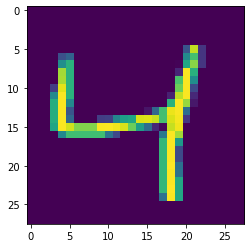

In [29]:
plt.imshow(mnist['data'][0,:].reshape((28,28)))#,cmap = 'binary')

In [24]:
mnist['target']

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [3]:
x = mnist['data']
y = mnist['target']
y = y.astype(np.uint8) #convert string to numeric values in alist
x_train, x_test, y_train, y_test = x[:60000,], x[60000:,], y[:60000,], y[60000:,]

In [8]:
y_train_5 = (y_train == 5)
print (y_train_5)

[ True False False ...  True False False]


In [4]:
from sklearn.linear_model import SGDClassifier

In [25]:
sgd = SGDClassifier()
sgd.fit(x_train, y_train_5)


SGDClassifier()

In [54]:
sgd.predict([x[0,]])

array([ True])

In [10]:
#measuring the model accuracy:
cross_val_score(sgd, x_train, y_train_5,cv = 3,scoring='accuracy')  #accuracy is about 94 percent in average.

array([0.9657 , 0.96615, 0.96755])

In [11]:
#measuring the model accuracy,the second solution:
from sklearn.base import BaseEstimator
class Never5classifier(BaseEstimator):  #classifies every single image in the 'not-5' class
    def fit(self,x,y=None):
        pass
    
    def predict(self,x):
        return np.zeros((len(x),1),dtype = bool)
    
never_5_clf = Never5classifier()
cross_val_score(never_5_clf, x_train, y_train_5,cv = 3,scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

In [61]:
len(y_train_5[y_train_5 ==True])/60000   
# 5 makes only 10 percent of data. then we can simply guess that the image is not 5
#so, you will be right about 90 percent of the time.
#the best way for measuring the accuracy of the model isconfusion matrix

0.09035

# confusion matrix

In [12]:
from sklearn.model_selection import cross_val_predict 

In [13]:
y_train_pred = cross_val_predict(sgd, x_train, y_train_5,cv =3)

In [5]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(y_train_5, y_train_pred)

array([[53794,   785],
       [ 1202,  4219]], dtype=int64)

In [68]:
precision = 4734/(4734+1916) #29 pecent of data was not predicted a number as a 5, whereas it was not 5.

0.7118796992481203

In [72]:
recall = 4734/(4734+1675) # 27 percent of data was predicted wrongly a number as a 5 number
recall

0.9793131981795614

           predict
   #       TN | FP
actual ------------------    ,
   #       FN | TP


sensivity = recall = TP/(TP+FN)     ,precision = TP/(TP+FP) , f1_score = TP/(TP+((FN+FP)/2))

*f1_score:it is a harmonic mean,it gives more weight to lower values. it is a simple way to compare two classifiers.

*example of recall:for findig bad vidoes for children, it is better to reduce FN and increase recall. recall is important than precision

*threshold:it is a number, if a score is greater than threshold, it assign the instance to positive class, otherwise it assigns to negative class.
*lower threshold will increase recall and decrease precision

In [16]:
from sklearn.metrics import precision_score,recall_score,f1_score
print('precision:', precision_score(y_train_5,y_train_pred)) #thresold = 0
print('recall',recall_score(y_train_5,y_train_pred))         #thresold = 0
print('f1_score:', f1_score(y_train_5,y_train_pred))

precision: 0.8431254996003198
recall 0.7782696919387567
f1_score: 0.809400479616307


# finding the best threshold:


In [17]:
#this code gives score for all instances in training set
y_score = cross_val_predict(sgd, x_train, y_train_5,cv =3, method = 'decision_function') 


In [18]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,threshold = precision_recall_curve(y_train_5,y_score)

In [79]:
precisions

array([0.15217133, 0.1521512 , 0.15215481, ..., 1.        , 1.        ,
       1.        ])

In [80]:
recalls

array([1.00000000e+00, 9.99843969e-01, 9.99843969e-01, ...,
       3.12061164e-04, 1.56030582e-04, 0.00000000e+00])

In [81]:
threshold

array([-27662.90957563, -27661.07061797, -27659.75998705, ...,
        54400.79191761,  58862.82813927,  61946.9314545 ])

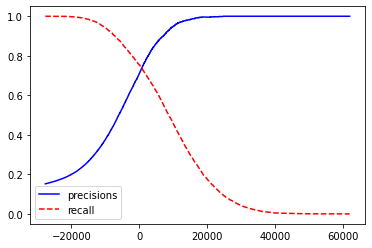

In [97]:
plt.plot(threshold,precisions[1:],'b-',label = 'precisions')
plt.plot(threshold,recalls[1:], 'r--',label = 'recall')
plt.legend()

Text(0, 0.5, 'precisions')

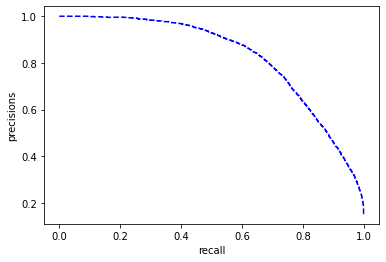

In [103]:
plt.plot(recalls,precisions, 'b--',label = 'recall')
plt.xlabel('recall')
plt.ylabel('precisions')

In [116]:
#change the threshold of prediction:
threshold_90_precision = threshold[np.argmax(precisions >= 0.90)]
y_train_pred_90 = (y_score >= threshold_90_precision)
y_train_pred_90
print('precisions:',precision_score(y_train_5,y_train_pred_90))
print('recall:',recall_score(y_train_5,y_train_pred_90))

precisions: 0.9000506072874493
recall: 0.55500078015291


# Multiclass classification

In [22]:
from sklearn.svm import SVC

In [24]:
some_digit = x[0,]
svm_clf = SVC()
svm_clf.fit(x_train,y_train)
y_pred_svm = svm_clf.predict([some_digit])
print(y_pred_svm)

[5]


In [ ]:
#calling decision function method to return 10 scores for every instance
svm._clf.decision_function([some_digit])
#the higest score is indeed the one corresponding to class 5.

# using OvO (one-versus-one) and OvR (one-versus-Rest) strategies 

In [27]:
from sklearn.multiclass import OneVsRestClassifier

In [ ]:
#using ovr strategy for svc classifiers:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(x_train, y_train)
print(ovr_clf.predict(some_digit))
print (len(ovr_clf.estimators_))

In [ ]:
#using ovr strategy for SGD classifiers:
sgd_clf = OneVsRestClassifier(sgd())
sgd_clf(x_train, y_train)
print(sgd_clf.predict(some_digit))
#decision_function returns a score for every class, the highest score is the output of prediction
print (sgd_clf.decision_function([some_digit])) 

In [ ]:
#using cross validation score to evaluate an algorithm:
cross_val_score(sgd_clf,x_train,y_train,cv =3, scoring = 'accuracy' )

In [ ]:
#using scaling before prediction, can import the score of the algorithm:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.astype(np.float64))
cross_val_score(sgd_clf,x_train_scaled,y_train,cv =3, scoring = 'accuracy' )

# Error Analysis in multiclass classification:

In [ ]:
y_pred_train = cross_val_score(sgd_clf,x_train_scaled,y_train,cv =3, scoring = 'accuracy' )
conf_mx = confusion_matrix(y_train, y_pred_train)
conf_mx

In [ ]:
plt.matshow(conf_mx)

In [ ]:
#focus on errors :
row_sum = conf_mx.sum()
norm_conf_mx = conf_mx / row_sum
plt.matshow(norm_conf_mx)

In [ ]:
cl_a =3, cl_b = 5
x_aa = x_train[(y_train == cl_a) & (y_pred_train == cl_a)]
x_bb = x_train[(y_train == cl_b) & (y_pred_train == cl_b)]
x_ab = x_train[(y_train == cl_a) & (y_pred_train == cl_b)]
x_ba = x_train[(y_train == cl_b) & (y_pred_train == cl_a)]

# Multilabel classification

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn_clf = KNeighborsClassifier()
y_train_large = (y_train >= 7)
y_train_odd = (y_train %2 == 1)
y_multilabel = np.c_[y_train_large,y_train_odd]   #prediction should has two output.
knn_clf.fit(x_train, y_multilabel)
some_digit = x[0,]
knn_clf.predict([some_digit])

array([[False,  True]])

In [14]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

In [ ]:
y_train_pred_knn = cross_val_predict(knn_clf, x_train, y_multilabel, cv = 3)
f1_score(y_multilabel, y_train_pred_knn, average= 'marco')       #average f1_score across all labels
f1_score(y_multilabel, y_train_pred_knn, average= 'weighted')    #it will weight classifer with more numbers

# Multioutput-Multiclass classification

In [ ]:
#example:removing noise from images, every pixel of image has a range of 0 ot 255 and an image is made of pixels.
